In [60]:
import pandas as pd
import numpy as np

data = {
    'Country': ['USA', 'usa', 'Canada', 'CANADA'],
    'City': ['New York', '  Los Angeles ', '  Toronto  ', 'Vancouver'],
    'Population': [8419000, '3971000 ', ' 2930000', 675218],  # mix of ints/strings/commas/spaces
    'Date': ['2023-07-01', '07/04/2023', '2023-07-03', '2023-07-02'],  # mixed date formats
    'Temperature': [25, 31, 28, 21]
}

df = pd.DataFrame(data)
print(df)
print(df.dtypes)

  Country            City Population        Date  Temperature
0     USA        New York    8419000  2023-07-01           25
1     usa    Los Angeles    3971000   07/04/2023           31
2  Canada       Toronto      2930000  2023-07-03           28
3  CANADA       Vancouver     675218  2023-07-02           21
Country        object
City           object
Population     object
Date           object
Temperature     int64
dtype: object


In [61]:

df['Country'] = df['Country'].astype('string').str.lower()
df['City'] = df['City'].astype('string').str.lower()
df['Population'] = pd.to_numeric(df['Population'], errors='coerce').astype('Int64')  # nullable integer
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce').astype('Int64')
# remove whitespace from both ends (equivalent compact form)
df['City'] = df['City'].str.strip()

df.dtypes

C:\Users\nivya\AppData\Local\Temp\ipykernel_17052\3158070046.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)


Country        string[python]
City           string[python]
Population              Int64
Date           datetime64[ns]
Temperature             Int64
dtype: object

In [62]:
# to eliminate all missing values : df.dropna(inplace=True)
df.dropna(inplace=True)
print(df['Country'].unique())
print(df.dtypes)
df

<StringArray>
['usa', 'canada']
Length: 2, dtype: string
Country        string[python]
City           string[python]
Population              Int64
Date           datetime64[ns]
Temperature             Int64
dtype: object


,Country,City,Population,Date,Temperature
0,usa,new york,8419000,2023-07-01,25
2,canada,toronto,2930000,2023-07-03,28
3,canada,vancouver,675218,2023-07-02,21


In [63]:
df.set_index(['Country', 'City', 'Date'], inplace=True)
canada_df = df.loc['canada']
canada_df

,,Population,Temperature
City,Date,,
toronto,2023-07-03,2930000,28
vancouver,2023-07-02,675218,21


In [66]:
df

Population  Temperature
Country City      Date                               
usa     new york  2023-07-01     8419000           25
canada  toronto   2023-07-03     2930000           28
        vancouver 2023-07-02      675218           21

In [68]:
hot_days =  df[df['Temperature'] > 24]
print(hot_days)

                             Population  Temperature
Country City     Date                               
usa     new york 2023-07-01     8419000           25
canada  toronto  2023-07-03     2930000           28


In [ ]:
# Using the DataFrame from the previous example
# Filter cities with population over 3 million
filtered_df = df[df['Population'] > 3000000]
print(filtered_df)

In [74]:
#Challenge
weather_data = pd.read_csv('./data/weather_data.csv')
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [ ]:
weather_data['Location'] = weather_data['Location'].astype('string').str.lower()
weather_data['Date_Time'] = pd.to_datetime(weather_data['Date_Time'], errors='coerce', infer_datetime_format=True)

weather_data.set_index(['Location', 'Date_Time', 'Temperature_C'])
san_diego = weather_data.loc('san diego')

san_diego_filtered = san_diego[san_diego['Temperature_C'] < 30]
san_diego_filtered


In [ ]:
import matplotlib.pyplot as plt

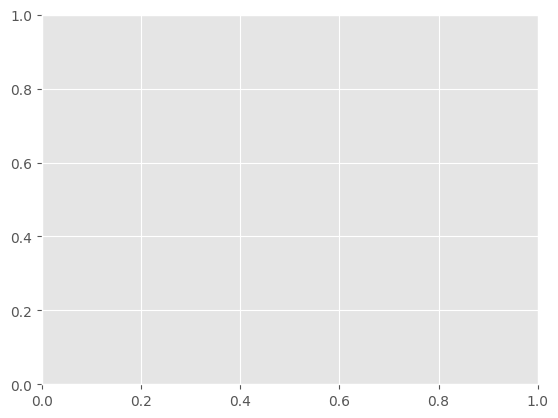

In [83]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

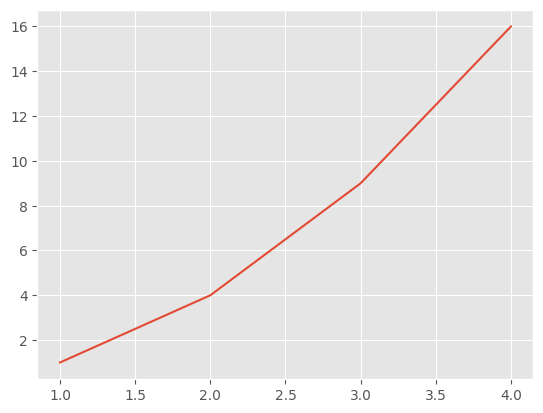

In [86]:
##Line Plots
# Sample data
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

# Create a new figure
plt.figure()

# Plot x and y
plt.plot(x, y)

# Show the plot
plt.show()

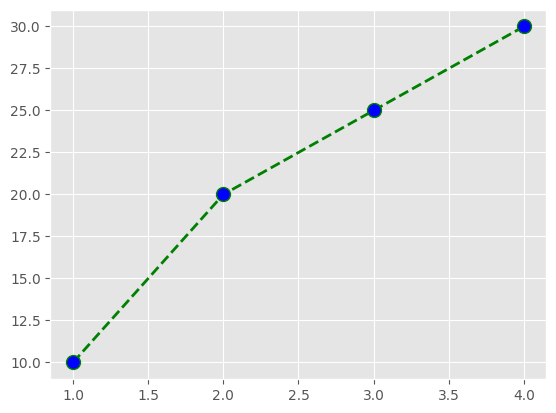

In [84]:
plt.plot(x, y, color='green', linestyle='--', linewidth=2,
         marker='o', markerfacecolor='blue', markersize=10)
plt.show()

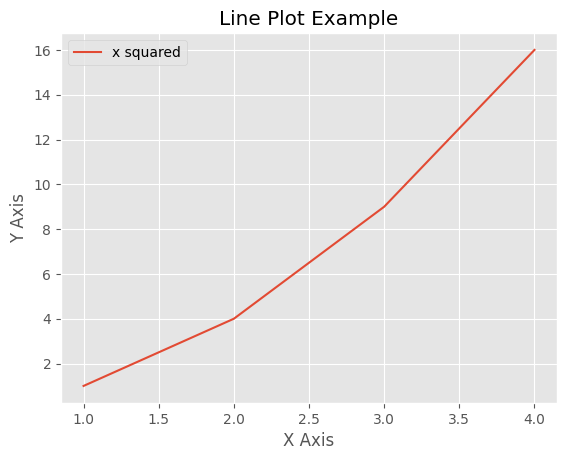

In [87]:
plt.plot(x, y, label='x squared')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot Example')
plt.legend()
plt.show()

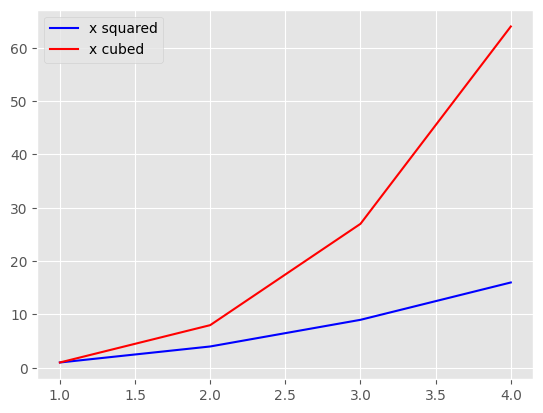

In [89]:
y2 = [x_i**3 for x_i in x]
plt.plot(x, y, label='x squared', color='blue')
plt.plot(x, y2, label='x cubed', color='red')
plt.legend()
plt.show()

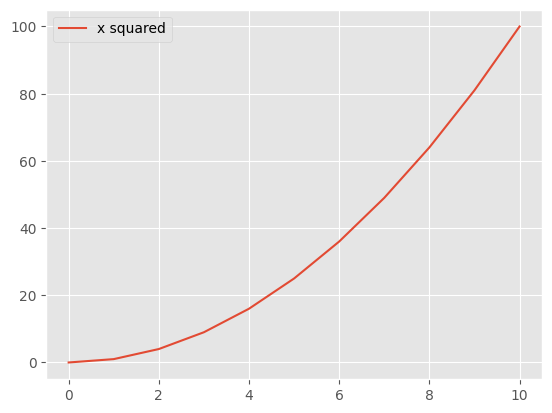

In [ ]:
#Exercise : Create a Line Plot
#Create a line plot for the function y = x^2 for x ranging from 0 to 10. x = 0, 1, 2...10 y = 0, 1, 4, .... 100

x = list(range(0,11))
y = [i**2 for i in x]

plt.plot(x, y, label='x squared')
plt.legend()
plt.show()

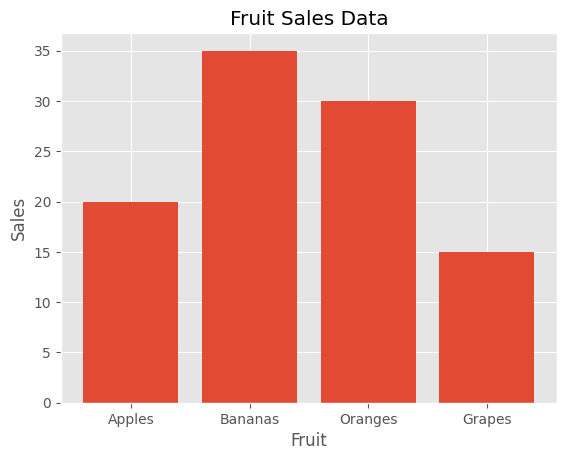

In [95]:
#Bar Charts
import matplotlib.pyplot as plt

categories = ['Apples', 'Bananas', 'Oranges', 'Grapes']
values = [20, 35, 30, 15]

plt.bar(categories, values)
plt.title('Fruit Sales Data')
plt.xlabel('Fruit')
plt.ylabel('Sales')
plt.show()

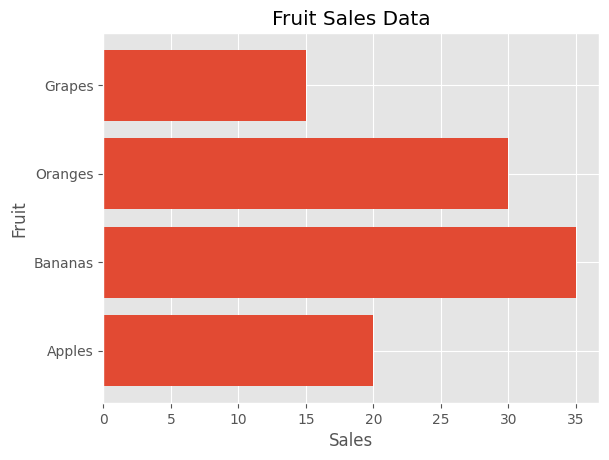

In [96]:
#Horizontal Bar Chart
plt.barh(categories, values) #Horizontal Bars
plt.title('Fruit Sales Data')
plt.xlabel('Sales')
plt.ylabel('Fruit')
plt.show()

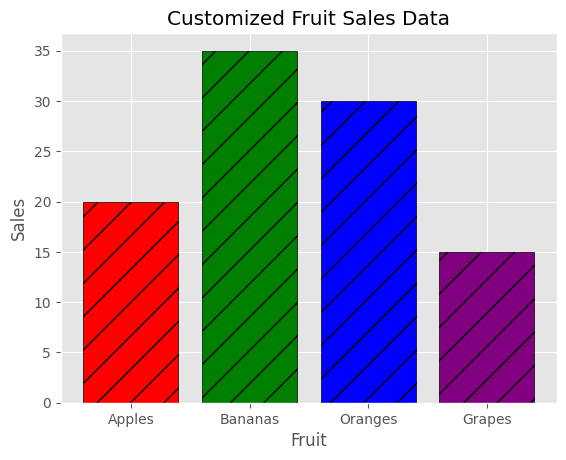

In [97]:
#Customizing a Bar Chart
plt.bar(categories, values, color=['red', 'green', 'blue', 'purple'], edgecolor='black', hatch='/')
plt.title('Customized Fruit Sales Data')
plt.xlabel('Fruit')
plt.ylabel('Sales')
plt.show()

In [1]:
#Adding Error Bars for Data Variability Representation
#Error bars can be added to bar charts to indicate the variability of the data and to give a clearer picture of the precision in the measurements.
import numpy as np

values = np.array(values)
std_dev = [2, 3, 4, 1]  # Standard deviation for each category

plt.bar(categories, values, yerr=std_dev, capsize=5)
plt.title('Fruit Sales Data with Error Bars')
plt.xlabel('Fruit')
plt.ylabel('Sales')
plt.show()
#Here, yerr is used to specify the error for each bar, and capsize determines the width of the caps on the error bars.

NameError: name 'values' is not defined

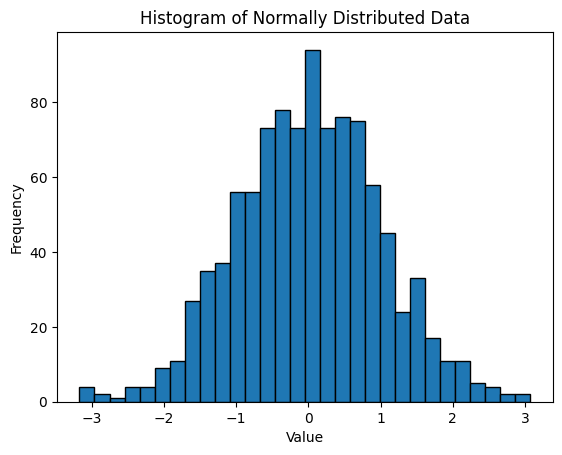

In [2]:
#Histograms
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.random.normal(0, 1, 1000) #(Mean; Standard deviation; Number of values to generate)

# Create a histogram
plt.hist(data, bins=30, edgecolor='black')
plt.title("Histogram of Normally Distributed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

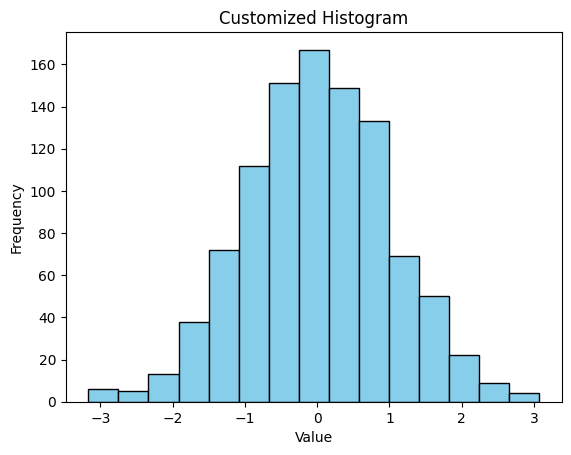

In [3]:
# Different bin sizes and colors
plt.hist(data, bins=15, color='skyblue', edgecolor='black')
plt.title("Customized Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

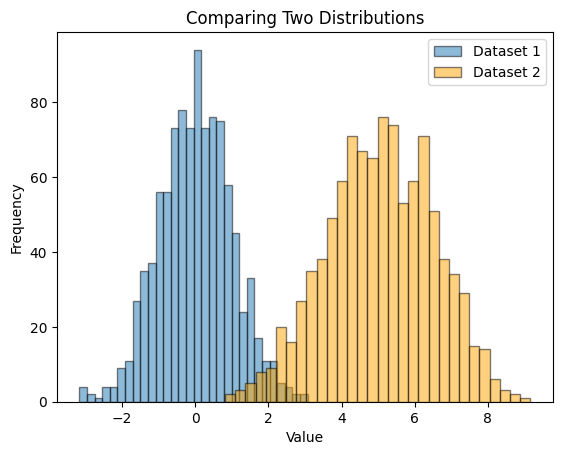

In [4]:
#Comparing Multiple Data Distributions

# Additional data for comparison
data2 = np.random.normal(5, 1.5, 1000)

# Create overlapping histograms
plt.hist(data, bins=30, alpha=0.5, label='Dataset 1', edgecolor='black') #alpha controls the transparency of the bars in the histogram
plt.hist(data2, bins=30, alpha=0.5, label='Dataset 2', color='orange', edgecolor='black')
plt.title("Comparing Two Distributions")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [1]:
#Scatter Plot

x = [5, 20, 40, 60, 80]
y = [25, 48, 85, 105, 125]

plt.scatter(x, y)
plt.title('Basic Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


NameError: name 'plt' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed to make the results reproducible
np.random.seed(0)

# Generate 25 random x and y coordinates between 0 and 1
x = np.random.rand(25)
y = np.random.rand(25)

# Generate 25 random color values between 0 and 1 (for use with colormap)
colors = np.random.rand(25)

# Generate 25 random sizes (scaled up to max 1000 for visibility)
sizes = 1000 * np.random.rand(25)

# Create a scatter plot:
# - x and y are positions
# - c=colors defines color of each point
# - s=sizes defines point sizes
# - alpha=0.3 makes the points semi-transparent
# - cmap='viridis' maps color values to the 'viridis' gradient
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')

# Show a color scale legend for the colormap
plt.colorbar()

# Add a title to the plot
plt.title('Custom Scatter Plot')

# Display the plot
plt.show()


In [ ]:
#Exercise


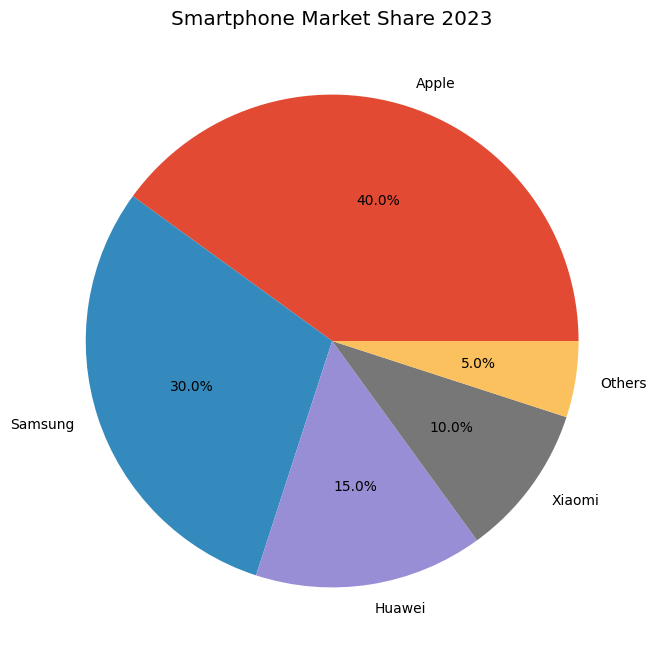

In [109]:
#Creating a Basic Pie Chart
import matplotlib.pyplot as plt

# Data
brands = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Others']
market_share = [40, 30, 15, 10, 5]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_share, labels=brands, autopct='%1.1f%%') #Displays the percentage on each slice with 1 decimal place (e.g., 25.0%)
plt.title('Smartphone Market Share 2023')
plt.show()

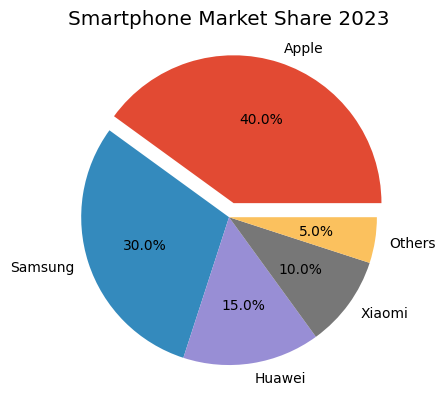

In [110]:
#Customizing the Pie Chart
explode = (0.1, 0, 0, 0, 0)  # Only explode the first slice (Apple)

plt.pie(market_share, labels=brands, autopct='%1.1f%%', explode=explode)
plt.title('Smartphone Market Share 2023')
plt.show()

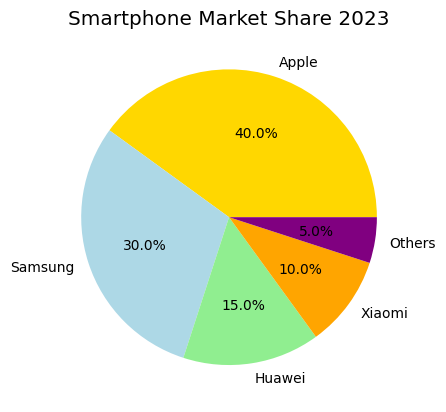

In [111]:
#Changing Colors: You can change the color of each slice.
colors = ['gold', 'lightblue', 'lightgreen', 'orange', 'purple']

plt.pie(market_share, labels=brands, autopct='%1.1f%%', colors=colors)
plt.title('Smartphone Market Share 2023')
plt.show()

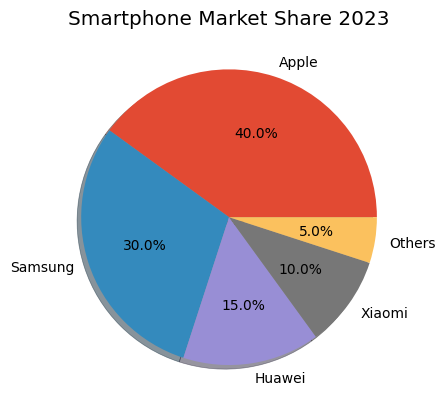

In [112]:
#Adding Shadow: Add a shadow for a 3D effect.
plt.pie(market_share, labels=brands, autopct='%1.1f%%', shadow=True)
plt.title('Smartphone Market Share 2023')
plt.show()

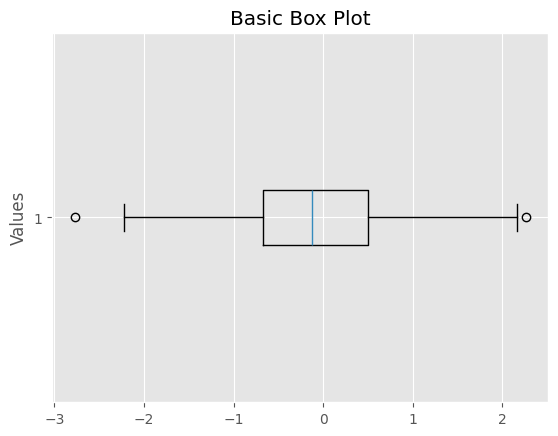

In [114]:
#Creating Box Plots with Matplotlib

import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.random.randn(100) #Generates 100 random numbers from a standard normal distribution (Mean = 0, Standard deviation = 1). The values are centered around 0

plt.boxplot(data, orientation='horizontal')
plt.title('Basic Box Plot')
plt.ylabel('Values')
plt.show()

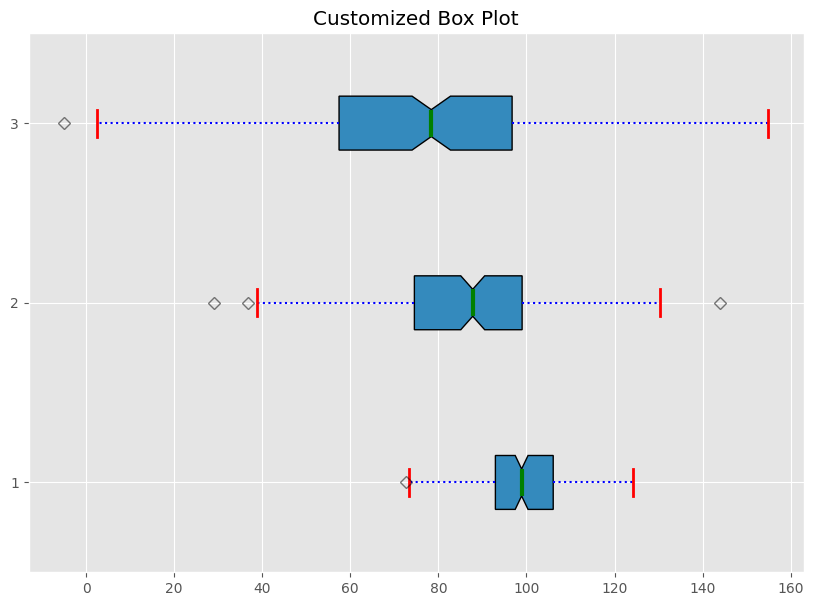

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 3 datasets with different means and standard deviations
data1 = np.random.normal(100, 10, 200)   # Mean=100, SD=10
data2 = np.random.normal(90, 20, 200)    # Mean=90, SD=20
data3 = np.random.normal(80, 30, 200)    # Mean=80, SD=30

# Combine all datasets into a list
data = [data1, data2, data3]

# Create a figure with a specific size
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)  # Add subplot to the figure (1 row, 1 col, 1st plot)

# Create horizontal box plots with customization options
bp = ax.boxplot(data,
                patch_artist=True,   # Fill boxes with color
                notch=True,          # Add notch to show confidence interval around the median
                vert=False)          # Draw boxes horizontally

# Customize whiskers (lines extending from the box to show range)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=1.5, linestyle=":")  # Dashed blue whiskers

# Customize caps (horizontal lines at the ends of whiskers)
for cap in bp['caps']:
    cap.set(color='red', linewidth=2)

# Customize medians (horizontal lines inside the box)
for median in bp['medians']:
    median.set(color='green', linewidth=3)

# Customize fliers (outliers shown as individual points)
for flier in bp['fliers']:
    flier.set(marker='D',            # Diamond shape
              color='#e7298a',       # Pink/magenta color
              alpha=0.5)             # Semi-transparent

# Add title to the plot
plt.title('Customized Box Plot')

# Show the final plot
plt.show()


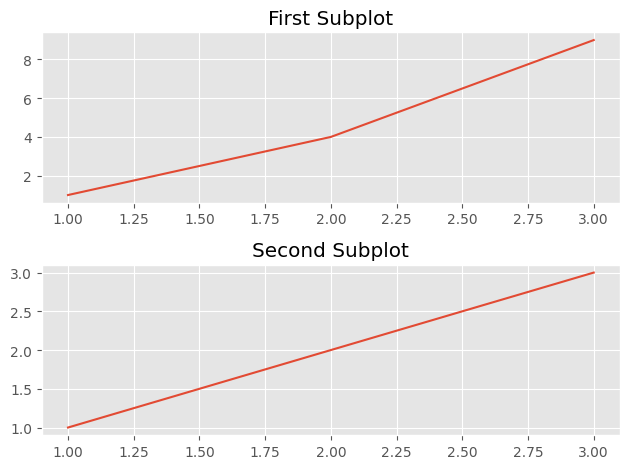

In [116]:
# Import the plotting library
import matplotlib.pyplot as plt

# Create a figure and two vertically stacked subplots (rows, column)
fig, (ax1, ax2) = plt.subplots(2, 1)

# First subplot: a simple curve
ax1.plot([1, 2, 3], [1, 4, 9])
ax1.set_title('First Subplot')

# Second subplot: a straight line
ax2.plot([1, 2, 3], [1, 2, 3])
ax2.set_title('Second Subplot')

# Automatically adjust spacing between subplots to avoid overlap
plt.tight_layout()

# Display the figure with both subplots
plt.show()



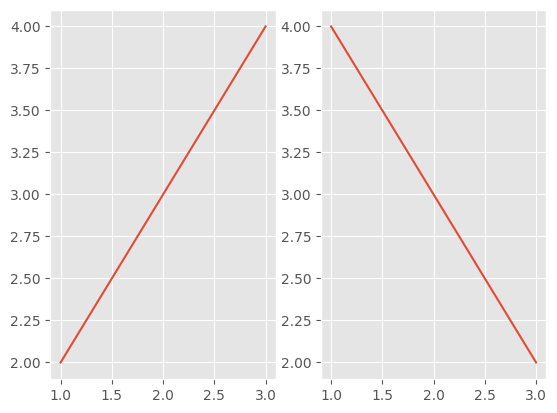

In [117]:
#Advanced Layouts with Subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot([1, 2, 3], [2, 3, 4])
ax2.plot([1, 2, 3], [4, 3, 2])

plt.show()

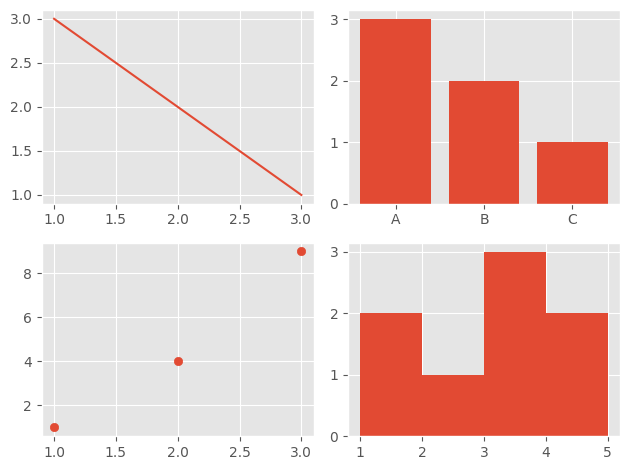

In [ ]:
#Advanced Layouts with Subplots

# Creating a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

# Plotting different types of plots
axs[0, 0].plot([1, 2, 3], [3, 2, 1])
axs[0, 1].bar(['A', 'B', 'C'], [3, 2, 1])
axs[1, 0].scatter([1, 2, 3], [1, 4, 9])
axs[1, 1].hist([1, 1, 2, 3, 3, 3, 4, 4], bins=[1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

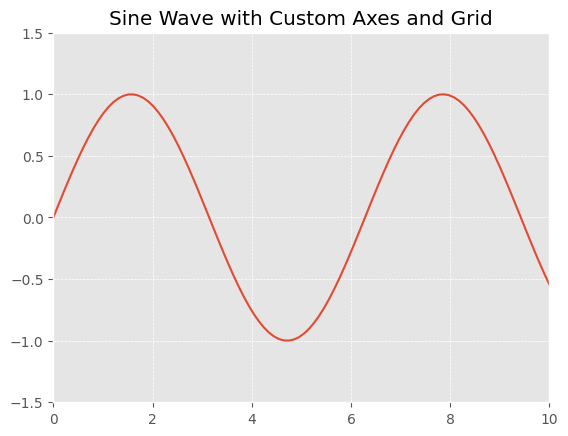

In [119]:
# Customizing Axes and Grids

import matplotlib.pyplot as plt
import numpy as np

# Generate 100 evenly spaced values from 0 to 10
x = np.linspace(0, 10, 100)

# Compute the sine of each value in x
y = np.sin(x)

# Plot the sine wave
plt.plot(x, y)

# Set the x-axis range from 0 to 10
plt.xlim(0, 10)

# Set the y-axis range from -1.5 to 1.5 (for better spacing around sine wave peaks)
plt.ylim(-1.5, 1.5)

# Enable grid lines:
#True - turns the grid on
# - 'which="both"' adds gridlines for both major and minor ticks
# - 'linestyle="--"' makes them dashed
# - 'linewidth=0.5' makes them thin
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a title to the plot
plt.title("Sine Wave with Custom Axes and Grid")

# Display the plot
plt.show()


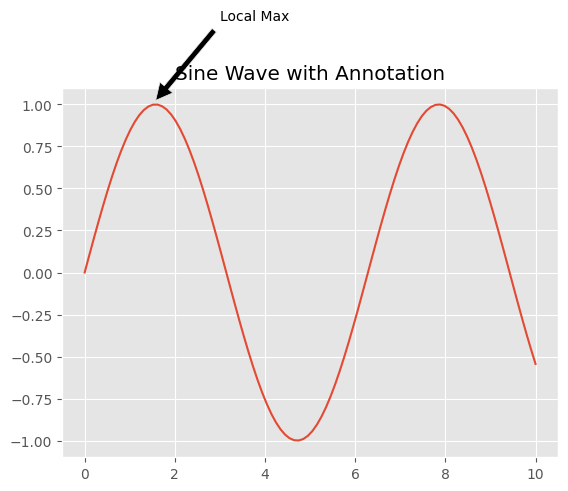

In [120]:
plt.plot(x, y)
plt.title("Sine Wave with Annotation")
plt.annotate('Local Max', xy=(1.5, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

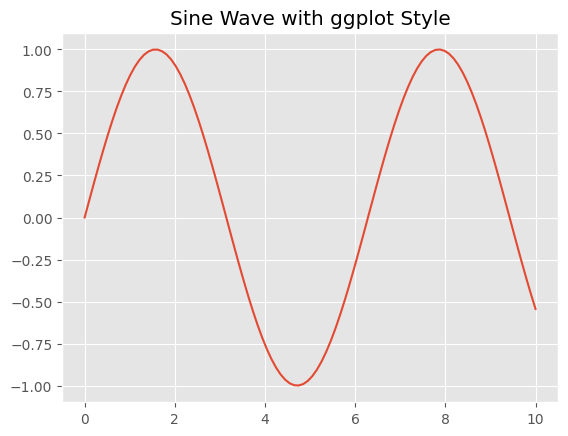

In [121]:
plt.style.use('ggplot')  # using ggplot style
plt.plot(x, y)
plt.title("Sine Wave with ggplot Style")
plt.show()

In [122]:
# Import required libraries
import numpy as np                                # For numerical operations and array creation
import matplotlib.pyplot as plt                   # For plotting functions
from ipywidgets import interact                   # For easy creation of interactive widgets
import ipywidgets as widgets                      # Full widgets library for customizing sliders and controls

# Generate 1000 evenly spaced time values between 0 and 1 second
t = np.linspace(0, 1, 1000)

# Define a function to plot a sine wave with a given frequency
def plot_sine(freq=5.0):
    y = np.sin(2 * np.pi * freq * t)              # Calculate the sine wave values for the given frequency
    plt.figure(figsize=(8, 3))                    # Create a new figure with custom size (8x3 inches)
    plt.plot(t, y)                                # Plot time (t) vs sine wave values (y)
    plt.title(f"Sine Wave (Frequency = {freq:.1f} Hz)")  # Add a title showing the current frequency
    plt.xlabel("Time (s)")                        # Label for the x-axis
    plt.ylabel("Amplitude")                       # Label for the y-axis
    plt.grid(True)                                # Add a grid to the plot for better readability
    plt.ylim(-1.5, 1.5)                           # Set consistent y-axis limits to avoid plot resizing
    plt.show()                                    # Display the plot

# Create an interactive slider for frequency and connect it to the plot_sine function
# FloatSlider allows choosing float values between 0.1 and 30.0 with step of 0.1
interact(plot_sine, freq=widgets.FloatSlider(value=5.0, min=0.1, max=30.0, step=0.1))


interactive(children=(FloatSlider(value=5.0, description='freq', max=30.0, min=0.1), Output()), _dom_classes=(…

<function __main__.plot_sine(freq=5.0)>

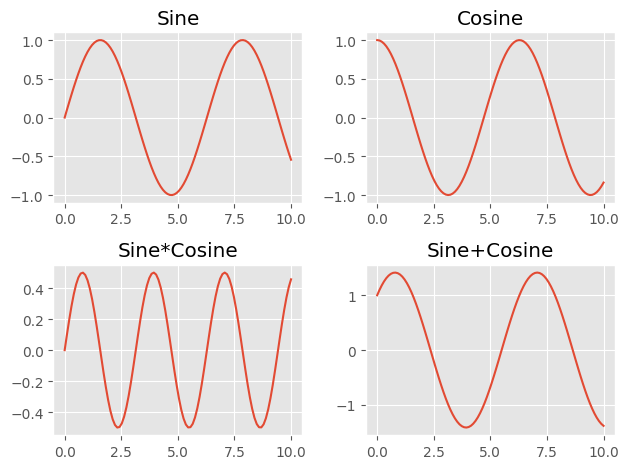

In [125]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, axes = plt.subplots(2, 2)  # 2x2 grid of subplots

axes[0, 0].plot(x, y1)
axes[0, 0].set_title('Sine')

axes[0, 1].plot(x, y2)
axes[0, 1].set_title('Cosine')

axes[1, 0].plot(x, y1*y2)
axes[1, 0].set_title('Sine*Cosine')

axes[1, 1].plot(x, y1+y2)
axes[1, 1].set_title('Sine+Cosine')

plt.tight_layout()
plt.show()